In [69]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import paxplot
from scipy import stats


In [72]:
CC_data = pd.read_pickle("D:/CC_analyzed_feat_set/CC_files_all_experimenters_all_conditions.p")
CC_exps = list(set(CC_data['exp_name']))
CC_exps_acsf = CC_data[CC_data.drug==False].exp_name 

FN_data = pd.read_pickle("D:/FN_analysed_feat_set/Ephys_collection_all_exps_all_conds_re.pkl")
# FN_data.cond = [i.lower() for i in FN_data.cond]
FN_data_acsf = FN_data[FN_data.cond=='acsf'] 
FN_exps = set(FN_data.exp_name) 
FN_exps_acsf = set(FN_data[FN_data.cond=='acsf'].exp_name) 


common_exps = (list(set(CC_exps_acsf) & set(FN_exps_acsf)))


common_FN = FN_data[FN_data.exp_name.isin(common_exps)]
common_CC = CC_data[CC_data.exp_name.isin(common_exps)]
CC_acsf = common_CC[common_CC.drug==False].drop_duplicates('exp_name')
FN_acsf = common_FN[common_FN.cond=='acsf'].drop_duplicates('exp_name')
FN_acsf = FN_acsf.sort_values('exp_name')
CC_acsf = CC_acsf.sort_values('exp_name')


In [73]:

Common_cols_FN = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',
       'first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude',
       'exp_name', 'cond', 'trialnr']


Common_cols_CC =  ['current_first_spike', 'ap_count', 'abs_firing_rate',
       'inst_firing_rate', 'time_to_first_spike',
       'mean_isi','median_isi', 'max_isi','min_isi',  
       'first_thrs', 'mean_thrs', 'median_thrs', 'min_thrs', 'max_thrs',  
       'mean_hwidths','median_hwidths', 'max_hwidths', 'min_hwidths', 
       'mean_amp','median_amp','min_amp', 'max_amp', 
       'cond', 'drug', 'exp_name','trialnr']


cols_to_scale  = ['first_thrs', 'mean_thrs', 'max_thrs','min_thrs', 'median_thrs','mean_amp','median_amp', 'max_amp', 'min_amp' ]

CC_acsf[cols_to_scale] = CC_acsf[cols_to_scale]*1000 
FN_acsf_ = FN_acsf[Common_cols_FN]
CC_acsf_ = CC_acsf[Common_cols_CC]
CC_acsf = CC_acsf_[CC_acsf_.columns[:-4]]
FN_acsf = FN_acsf_[FN_acsf_.columns[:-3]]

In [74]:
CC_acsf.columns = FN_acsf.columns


In [75]:
df_all = pd.concat([FN_acsf,CC_acsf])
df_all['protocol'] = np.hstack([np.repeat(1,len(FN_acsf)),np.repeat(0,len(FN_acsf))])


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figheight) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figwidth) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(


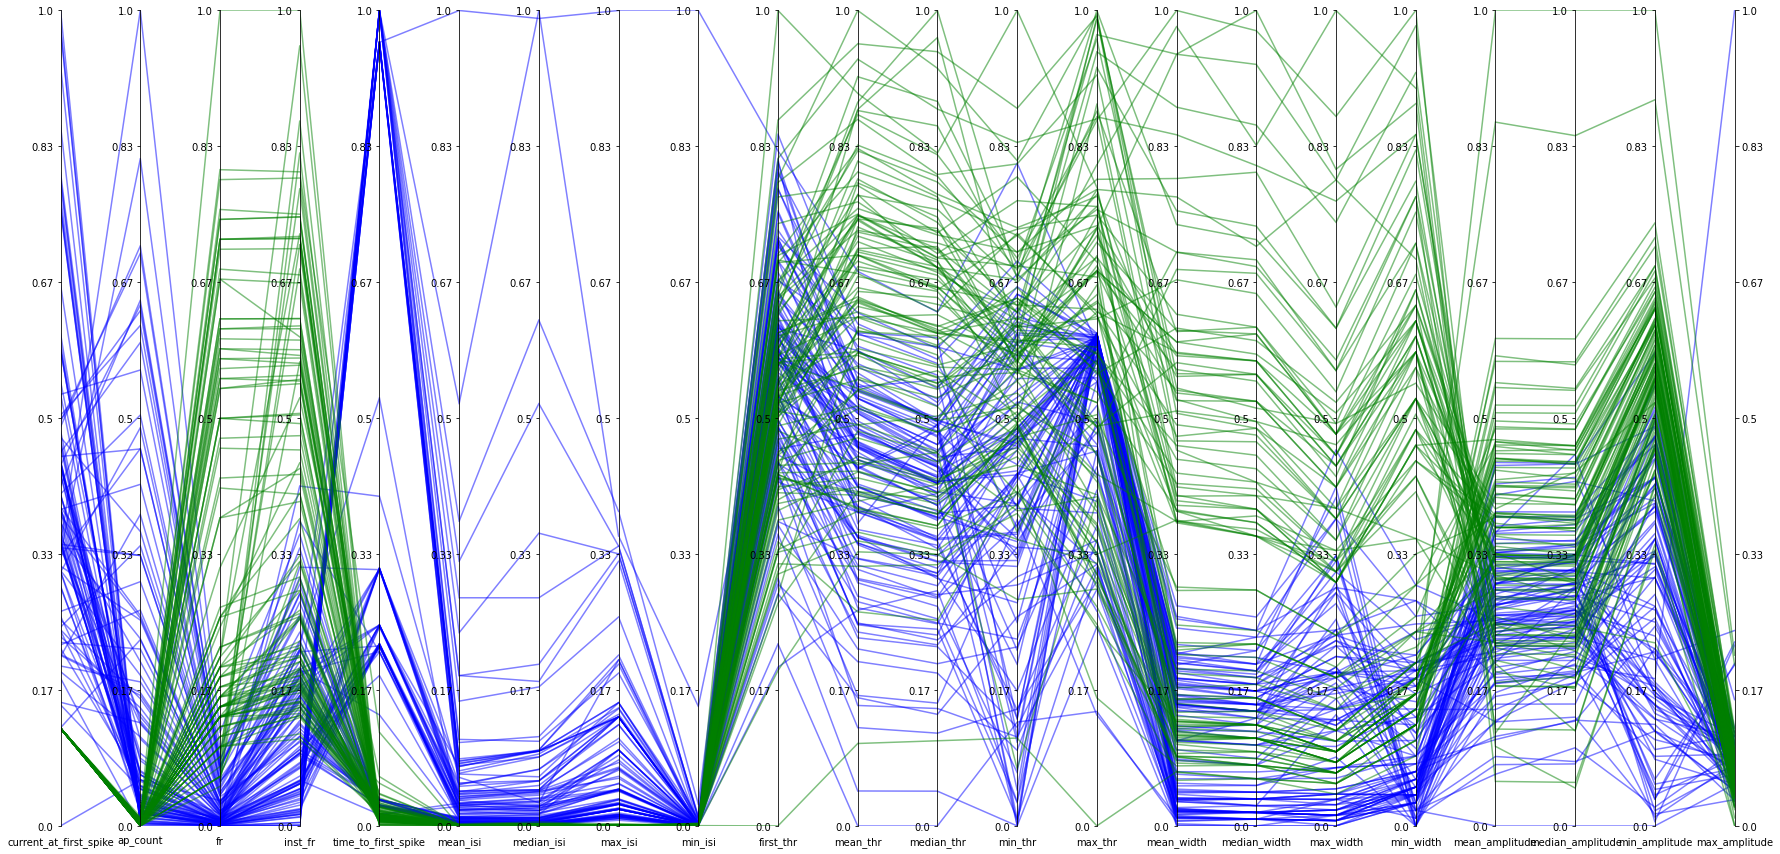

In [76]:

# # Import data
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler_std = StandardScaler()

# Create figure
paxfig = paxplot.pax_parallel(n_axes=len(df_all.columns[:-1]))
paxfig.set_figheight(15)
paxfig.set_figwidth(30)

scaled = scaler.fit_transform(df_all[df_all.columns[:-1]].to_numpy())

scaled_std = scaler.fit_transform(df_all[df_all.columns[:-1]].to_numpy())

paxfig.plot(
    scaled[:len(FN_acsf)], #stats.zscore(df_acsf_1.to_numpy())
    line_kwargs={'alpha': 0.5, 'color': 'blue', 'zorder': 1}
)

paxfig.plot(
    scaled[-len(FN_acsf):], #stats.zscore(df_acsf_1.to_numpy())
    line_kwargs={'alpha': 0.5, 'color': 'green', 'zorder': 1}
)

# for  ax in paxfig.axes:   
#     ax.tick_params(axis='x', labelsize=20)
#     ax.tick_params(axis='y', labelsize=20)
# # Add labels
paxfig.set_labels(FN_acsf.columns)
# plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/paralell_plot_all_acsf.png',dpi=200)

In [77]:
link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)
df =df.dropna()
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [111]:
	
X = df[['bill_length_mm','bill_depth_mm']]
Y = df[['bill_length_mm','bill_depth_mm']] + np.random.randn(X.shape[0],X.shape[1])*10 #df[['flipper_length_mm','body_mass_g']]

X_mc = (X-X.mean())/(X.std())
Y_mc = (Y-Y.mean())/(Y.std())

ca = CCA()
ca.fit(X_mc, X_mc)
X_c, Y_c = ca.transform(X_mc, X_mc)

score = ca.score(X_mc, X_mc)
print(score)


1.0


In [108]:
ca.score(X_mc,X_mc)

0.9763330077602314

In [79]:
import numpy as np
for i in range(2):
    print(np.corrcoef(X_c[:, i], Y_c[:, i]))



[[1.         0.93993354]
 [0.93993354 1.        ]]
[[1.         0.66891859]
 [0.66891859 1.        ]]


In [202]:
import numpy as np
from sklearn.cross_decomposition import CCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


df_all_CCA = df_all[df_all.columns[:-1]] 
CC_std = df_all_CCA[-len(FN_acsf):]
FN_std = df_all_CCA[:len(FN_acsf)]


X_train, X_test, y_train, y_test = train_test_split(CC_std, FN_std, test_size=0.4, random_state=42)

def perform_CCA(X,y,n_components=22):
    ca = CCA(n_components=n_components)
    ca.fit(X, y)
    X_c, Y_c = ca.transform(X,y)
    x_weights = ca.x_weights_
    score = ca.score(X , y)
    print(score)
    return X_c,Y_c,ca


X_c_train,Y_c_train,ca_train = perform_CCA(X_train,y_train,n_components=22)

X_c_test,Y_c_test,ca_test = perform_CCA(X_test,y_test,n_components=22)

X_c_all,Y_c_all,ca_all = perform_CCA(CC_std,FN_std,n_components=22)

0.5617292949943192
-0.1915213612211299
0.41205839497285446


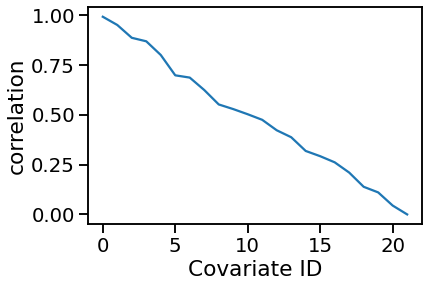

In [211]:
# plt.plot([np.corrcoef(X_c_train[:,i],Y_c_train[:,i])[0,1] for i in range(22)],label='train')
# plt.plot([np.corrcoef(X_c_test[:,i],Y_c_test[:,i])[0,1] for i in range(22)],label='test')
plt.plot([np.corrcoef(X_c_all[:,i],Y_c_all[:,i])[0,1] for i in range(22)],label='all')
# plt.legend()
plt.xlabel('Covariate ID')
plt.ylabel('correlation')
plt.show()

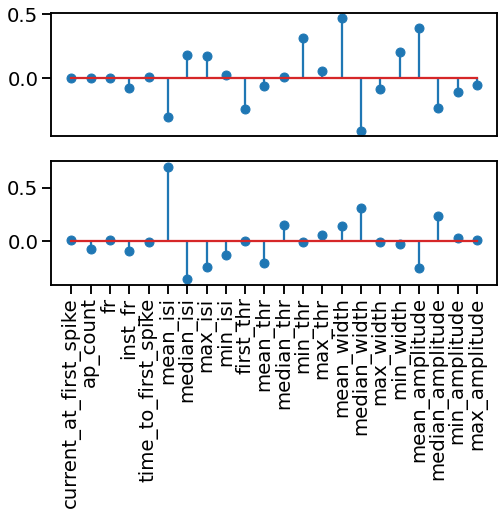

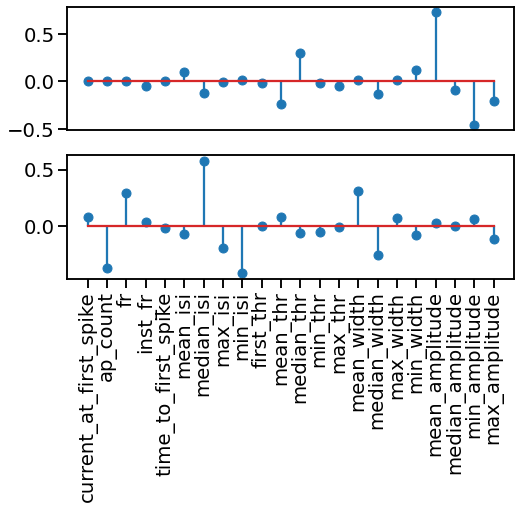

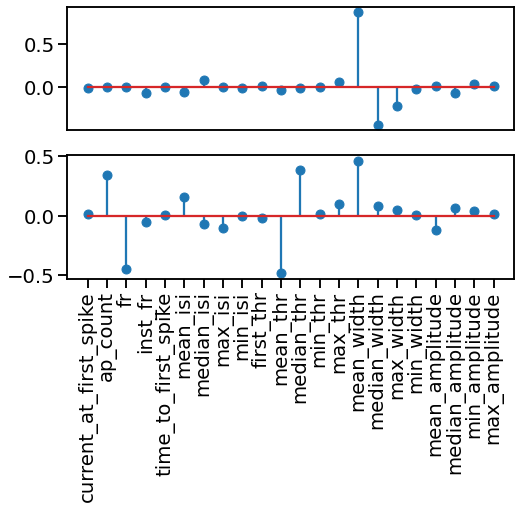

In [204]:
fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_train.x_weights_[:,0])
# ax1.set_xticks(np.arange(0,22),cols[:],rotation=90)
# ax1.tight_layout=True
ax1.set_xticks([])
ax2.stem(ca_train.y_weights_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_test.x_weights_[:,0])
# ax1.set_xticks(np.arange(0,22),cols[:],rotation=90)
# ax1.tight_layout=True
ax1.set_xticks([])
ax2.stem(ca_test.y_weights_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_all.x_weights_[:,0])
# ax1.set_xticks(np.arange(0,22),cols[:],rotation=90)
# ax1.tight_layout=True
ax1.set_xticks([])
ax2.stem(ca_all.y_weights_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

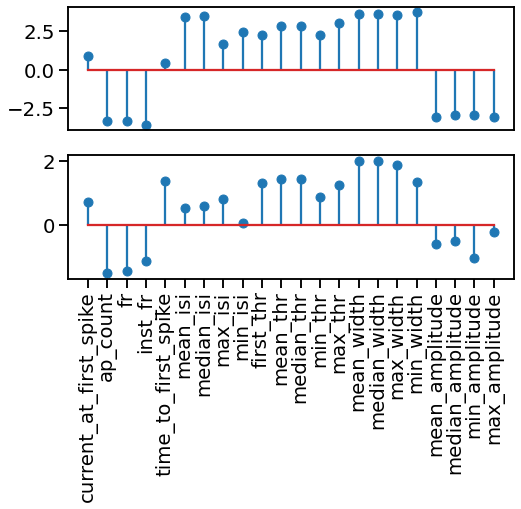

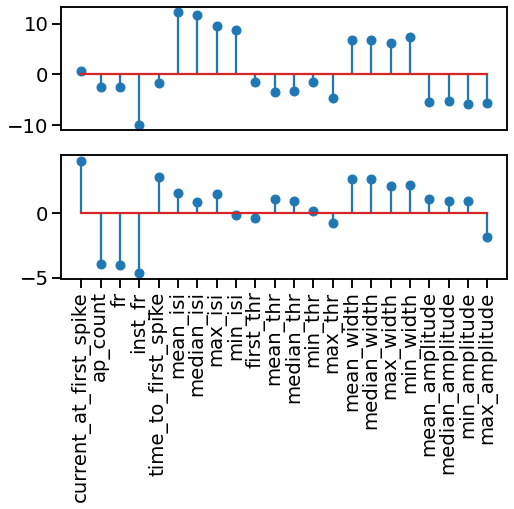

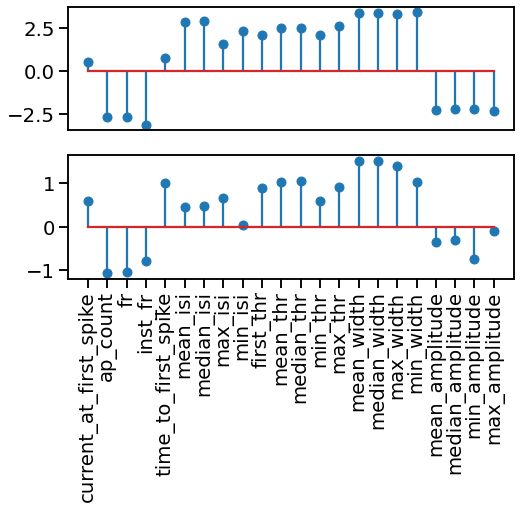

In [190]:
fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_train.x_loadings_[:,0])
ax1.set_xticks([])
ax2.stem(ca_train.y_loadings_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_test.x_loadings_[:,0])
ax1.set_xticks([])
ax2.stem(ca_test.y_loadings_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_all.x_loadings_[:,0])
ax1.set_xticks([])
ax2.stem(ca_all.y_loadings_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

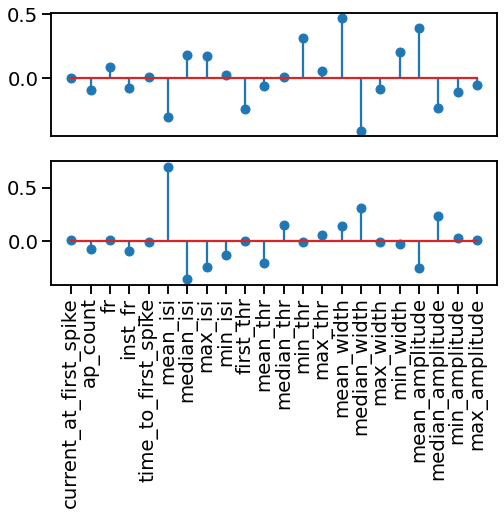

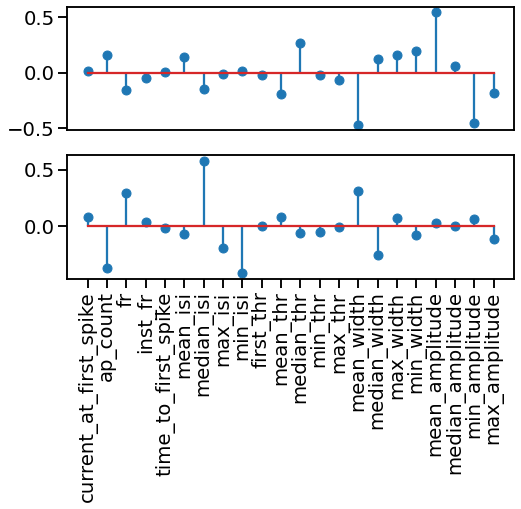

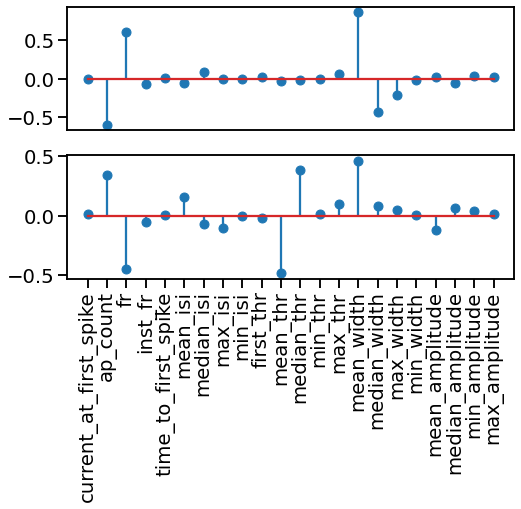

In [205]:
fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_train.x_rotations_[:,0])
ax1.set_xticks([])
ax2.stem(ca_train.y_rotations_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_test.x_rotations_[:,0])
ax1.set_xticks([])
ax2.stem(ca_test.y_rotations_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_all.x_rotations_[:,0])
ax1.set_xticks([])
ax2.stem(ca_all.y_rotations_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

In [182]:
cc_res_train = pd.DataFrame({"CCX_1":X_c_train[:, 0],
                            "CCY_1": Y_c_train[:, 0],
                            "CCX_2": X_c_train[:, 1],
                            "CCY_2": Y_c_train[:, 1]})                       

cc_res_test = pd.DataFrame({"CCX_1":X_c_test[:, 0],
                            "CCY_1":Y_c_test[:, 0],
                            "CCX_2":X_c_test[:, 1],
                            "CCY_2":Y_c_test[:, 1]})                       

cc_res_all =  pd.DataFrame({"CCX_1":X_c_all[:, 0],
                            "CCY_1":Y_c_all[:, 0],
                            "CCX_2":X_c_all[:, 1],
                            "CCY_2":Y_c_all[:, 1]})                       


In [183]:
import numpy as np
for i in range(2):
    print(np.corrcoef(X_c_train[:, i], Y_c_train[:, i])[0,1])

for i in range(2):
    print(np.corrcoef(X_c_test[:, i], Y_c_test[:, i])[0,1])

for i in range(2):
    print(np.corrcoef(X_c_all[:, i], Y_c_all[:, i])[0,1])


0.9986434167571314
0.9886301475532335
0.9775040982654837
0.9754692568431893
0.9903035533155524
0.9490586000467306


Text(0.5, 1.0, 'Comp. 1, corr = 1.00')

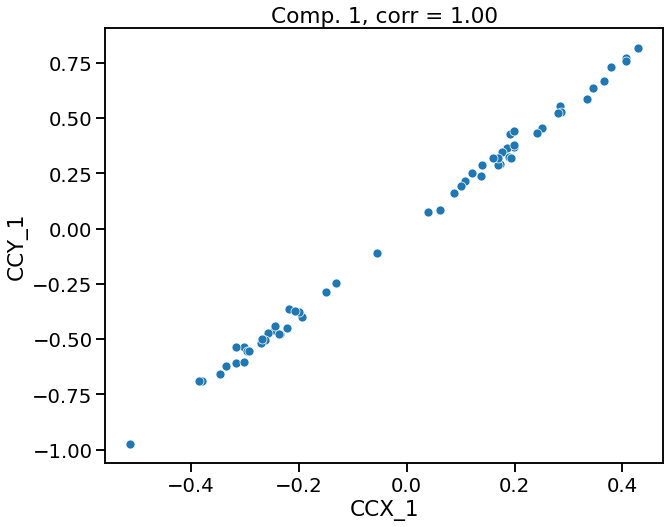

In [150]:
import seaborn as sns
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                data=cc_res_train)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(X_c_train[:, 0], Y_c_train[:, 0])[0, 1])

Text(0.5, 1.0, 'Comp. 1, corr = 1.00')

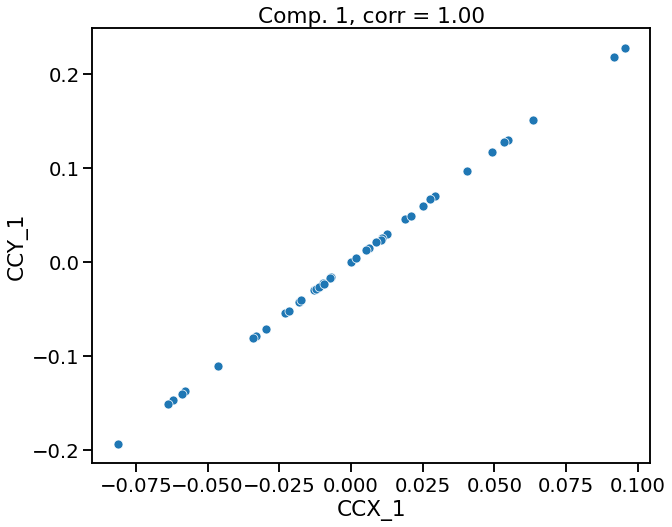

In [84]:
import seaborn as sns
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                data=cc_res_test)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(X_c_test[:, 0], Y_c_test[:, 0])[0, 1])

Text(0.5, 1.0, 'Comp. 2, corr = 0.99')

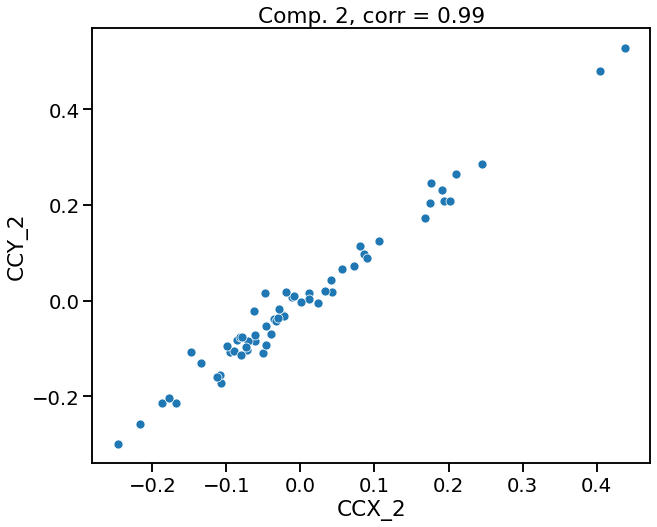

In [85]:
import seaborn as sns
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_2",
                y="CCY_2", 
                data=cc_res_train)
plt.title('Comp. 2, corr = %.2f' %
         np.corrcoef(X_c_train[:, 1], Y_c_train[:, 1])[0, 1])

Text(0.5, 1.0, 'Comp. 2, corr = 0.99')

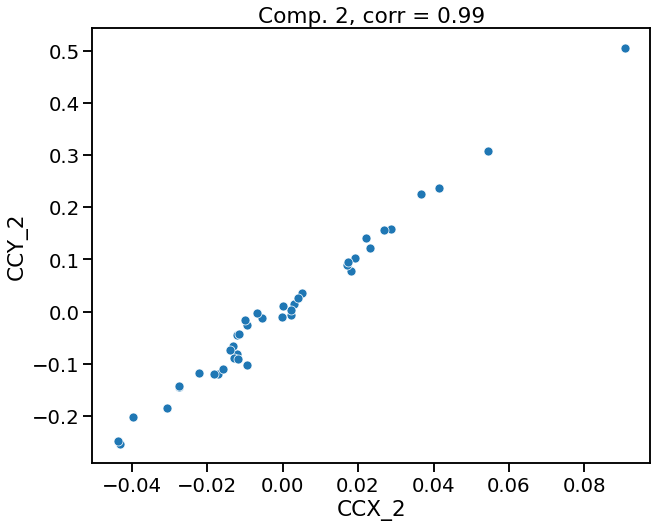

In [86]:
import seaborn as sns
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_2",
                y="CCY_2", 
                data=cc_res_test)
plt.title('Comp. 2, corr = %.2f' %
         np.corrcoef(X_c_test[:, 1], Y_c_test[:, 1])[0, 1])

In [87]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',
       'first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude']


second_half = pd.read_pickle("D:/FN_analysed_feat_set/Ephys_collection_all_exps_all_conds_second.pkl")
second_half = second_half[second_half.cond=='acsf']
second_half = second_half.dropna()
second_half = second_half.drop_duplicates('exp_name')
waves_second = second_half['waveform']

first_half = pd.read_pickle("D:/FN_analysed_feat_set/Ephys_collection_all_exps_all_conds_first.pkl")
first_half = first_half[first_half.cond=='acsf']
first_half = first_half.dropna()
first_half = first_half.drop_duplicates('exp_name')
# first_half = first_half[first_half.exp_name.isin(second_half)]

waves_first = first_half['waveform']




first_half = first_half[cols]
# first_half = first_half[cols_FN]


second_half = second_half[cols]
# second_half = second_half[cols_FN]

df_all_FS = pd.concat([first_half,second_half])


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figheight) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figwidth) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(


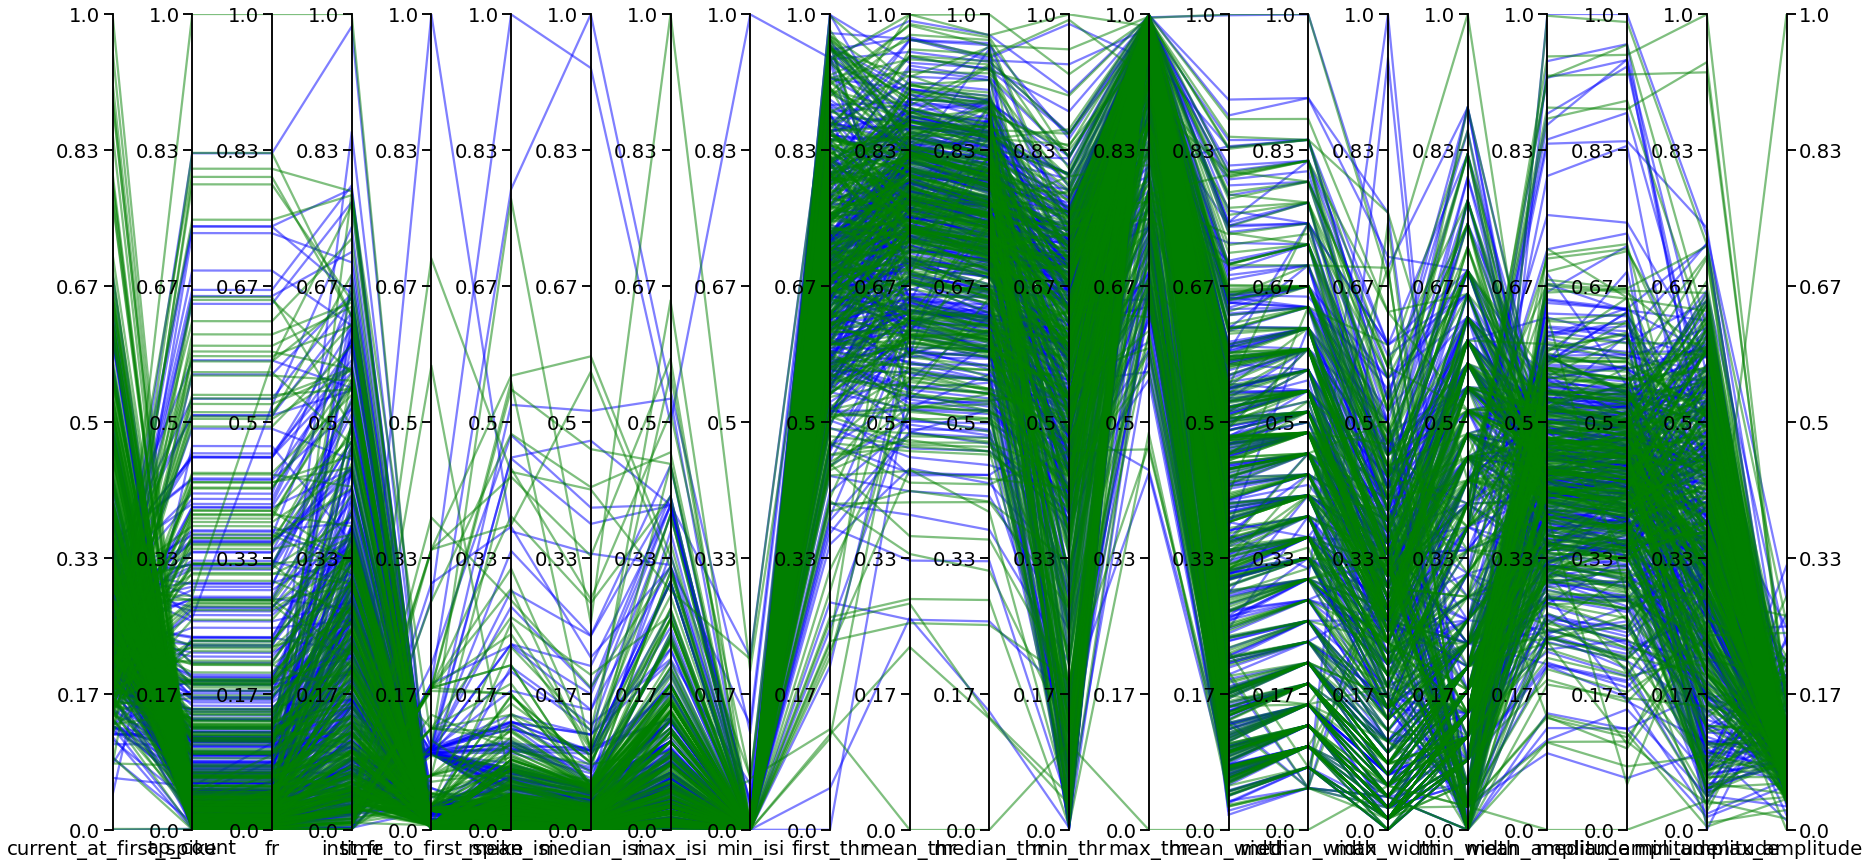

In [153]:

# # Import data
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler_std = StandardScaler()

# Create figure
paxfig = paxplot.pax_parallel(n_axes=len(df_all_FS.columns))
paxfig.set_figheight(15)
paxfig.set_figwidth(30)

scaled = scaler.fit_transform(df_all_FS.to_numpy())

scaled_std = scaler.fit_transform(df_all_FS.to_numpy())

paxfig.plot(
    scaled[:len(first_half)], #stats.zscore(df_acsf_1.to_numpy())
    line_kwargs={'alpha': 0.5, 'color': 'blue', 'zorder': 1}
)

paxfig.plot(
    scaled[-len(first_half):], #stats.zscore(df_acsf_1.to_numpy())
    line_kwargs={'alpha': 0.5, 'color': 'green', 'zorder': 1}
)

paxfig.set_labels(cols)
# plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/paralell_plot_all_acsf.png',dpi=200)

In [200]:
import numpy as np
from sklearn.cross_decomposition import CCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


df_all_CCA = df_all_FS[df_all_FS.columns] 
first = df_all_CCA[-len(first_half):]
second = df_all_CCA[:len(first_half)]


X_train, X_test, y_train, y_test = train_test_split(first,second, test_size=0.4, random_state=42)

def perform_CCA(X,y,n_components=2):
    ca = CCA(n_components=n_components)
    ca.fit(X, y)
    X_c, Y_c = ca.transform(X,y)
    x_weights = ca.x_weights_
    score = ca.score(X , y,sample_weight=np.ones(len(y)))
    print(score)
    return X_c,Y_c,ca


X_c_train,Y_c_train,ca_train = perform_CCA(X_train,y_train,n_components=22)

X_c_test,Y_c_test,ca_test = perform_CCA(X_test,y_test,n_components=22)

X_c_all,Y_c_all,ca_all = perform_CCA(first, second,n_components=22)


0.7769723455186088
0.8299021905506799


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


0.7259823126879582


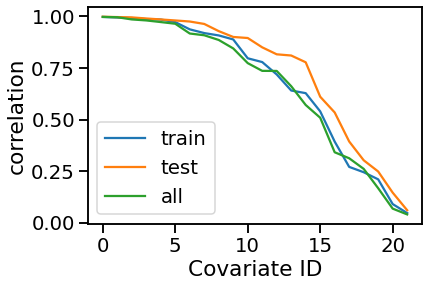

In [201]:
plt.plot([np.corrcoef(X_c_train[:,i],Y_c_train[:,i])[0,1] for i in range(22)],label='train')
plt.plot([np.corrcoef(X_c_test[:,i],Y_c_test[:,i])[0,1] for i in range(22)],label='test')
plt.plot([np.corrcoef(X_c_all[:,i],Y_c_all[:,i])[0,1] for i in range(22)],label='all')
plt.legend()
plt.xlabel('Covariate ID')
plt.ylabel('correlation')
plt.show()

In [185]:
import numpy as np
for i in range(2):
    print(f'corr coeff for canonical variable ',i+1,np.corrcoef(X_c_train[:, i], Y_c_train[:, i])[0,1])

for i in range(2):
    print(f'corr coeff for canonical variable ',i+1,np.corrcoef(X_c_test[:, i], Y_c_test[:, i])[0,1])

for i in range(2):
    print(f'corr coeff for canonical variable ',i+1,np.corrcoef(X_c_all[:, i], Y_c_all[:, i])[0,1])


corr coeff for canonical variable  1 0.9978028358546799
corr coeff for canonical variable  2 0.994984943977722
corr coeff for canonical variable  1 0.9987153382024717
corr coeff for canonical variable  2 0.9970896435152126
corr coeff for canonical variable  1 0.9978181335682659
corr coeff for canonical variable  2 0.9963917804150074


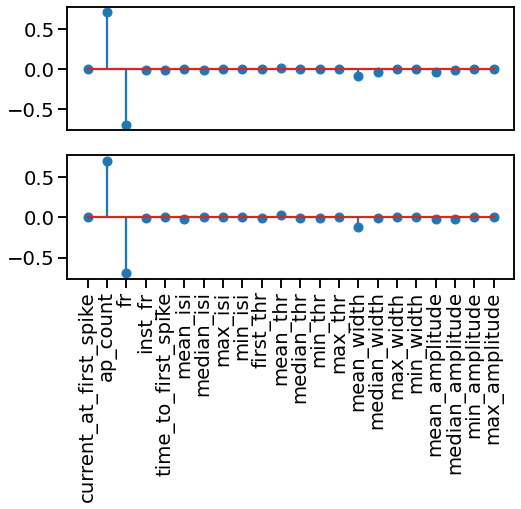

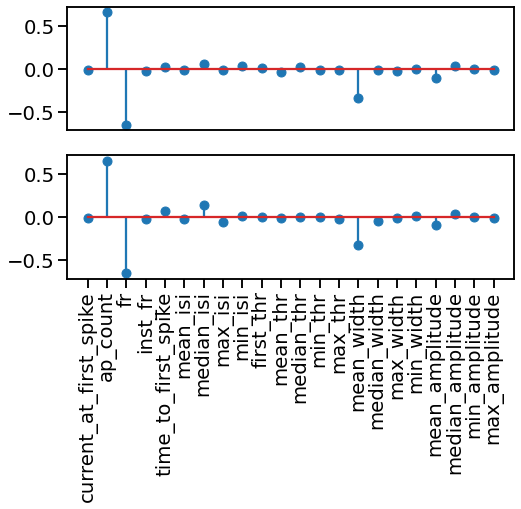

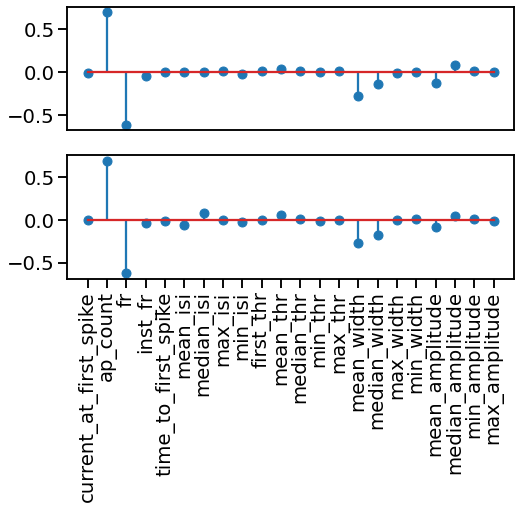

In [186]:
fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_train.x_weights_[:,0])
ax1.set_xticks([])
ax2.stem(ca_train.y_weights_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_test.x_weights_[:,0])
ax1.set_xticks([])
ax2.stem(ca_test.y_weights_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_all.x_weights_[:,0])
ax1.set_xticks([])
ax2.stem(ca_all.y_weights_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

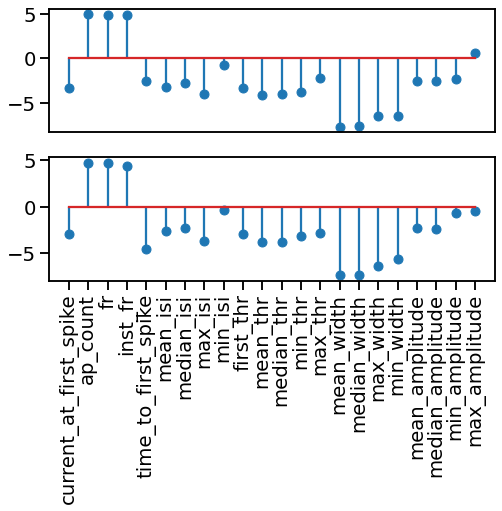

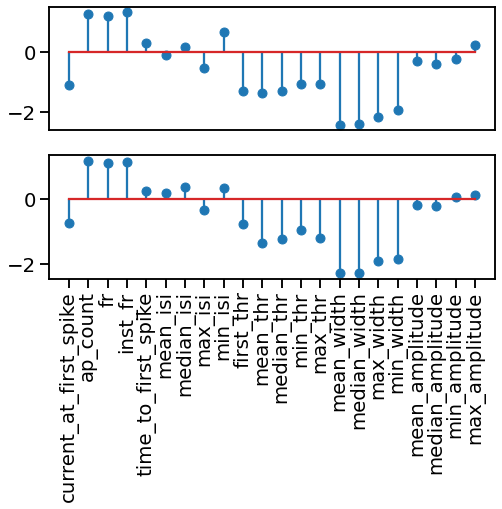

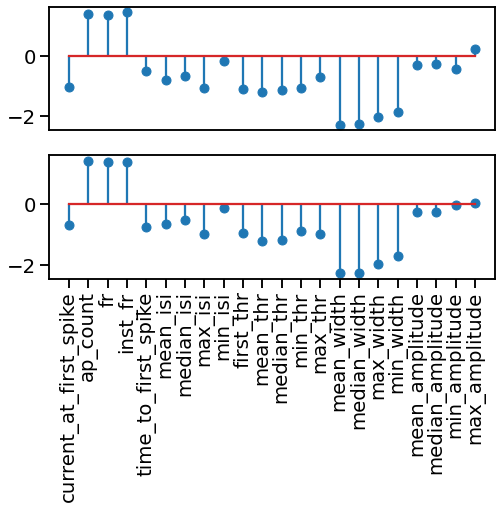

In [188]:
fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_train.x_loadings_[:,0])
ax1.set_xticks([])
ax2.stem(ca_train.y_loadings_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_test.x_loadings_[:,0])
ax1.set_xticks([])
ax2.stem(ca_test.y_loadings_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_all.x_loadings_[:,0])
ax1.set_xticks([])
ax2.stem(ca_all.y_loadings_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

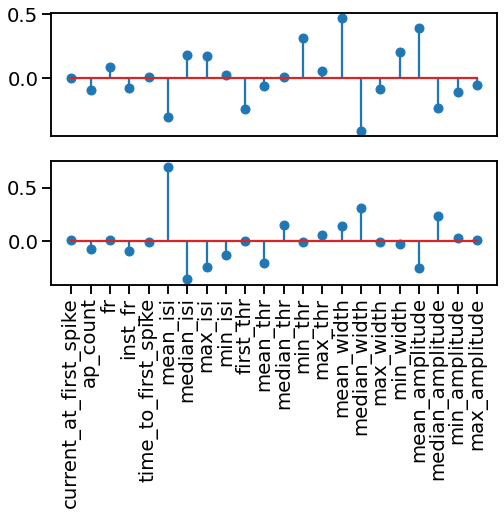

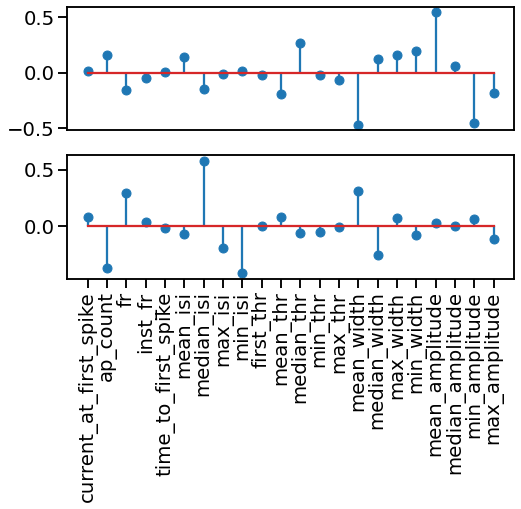

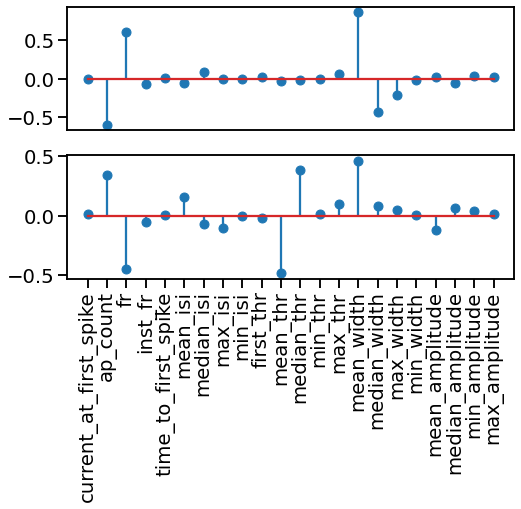

In [209]:
fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_train.x_rotations_[:,0])
ax1.set_xticks([])
ax2.stem(ca_train.y_rotations_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_test.x_rotations_[:,0])
ax1.set_xticks([])
ax2.stem(ca_test.y_rotations_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()

fig,[ax1,ax2] = plt.subplots(2, figsize=[8,5])
ax1.stem(ca_all.x_rotations_[:,0])
ax1.set_xticks([])
ax2.stem(ca_all.y_rotations_[:,0])
ax2.set_xticks(np.arange(0,22),cols[:],rotation=90)
ax2.tight_layout=True
plt.show()